# 01. Estimated 1RM Over Time Chart

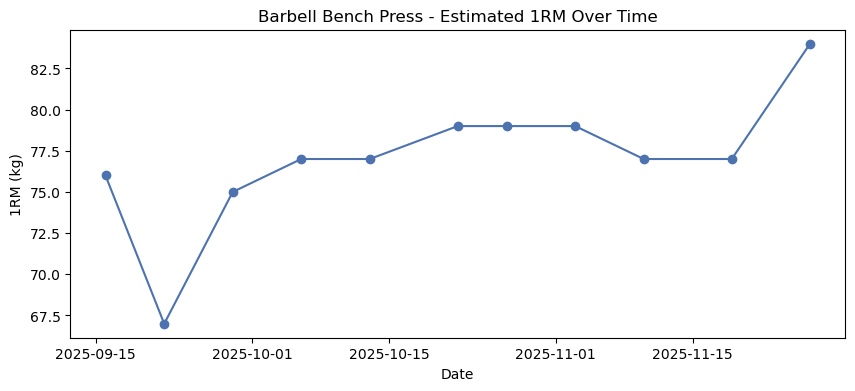

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PATH  = Path(r"C:\Users\aakas\Documents\workout_project")

df = pd.read_csv(DATA_PATH / "data_processed" / "workouts_daily_exercise.csv", parse_dates=['date'])

ex = "Barbell Bench Press"
sub = df[df.exercise==ex].sort_values("date")

plt.figure(figsize=(10,4))
plt.plot(sub["date"], sub["max_1rm"], marker="o")

# plt.plot(
#     sub["date"], sub["max_1rm"] ,
#     color='blue',            # Sets the line color to blue
#     linestyle='-',           # Sets a solid line style
#     marker='o',              # Sets the marker shape to a circle (dot)
#     markerfacecolor='red',   # Sets the fill color of the marker to red
#     markeredgecolor='red',   # Sets the edge color of the marker to red (to make the whole dot red)
#     markersize=8             # Adjusts the size of the markers
# )
plt.title(f"{ex} - Estimated 1RM Over Time")
plt.xlabel("Date")
plt.ylabel("1RM (kg)")
plt.grid(False)
plt.savefig(DATA_PATH/"visualizations"/"bench_1rm.png", dpi=300)
plt.show()

# 02. Weekly Volume Chart

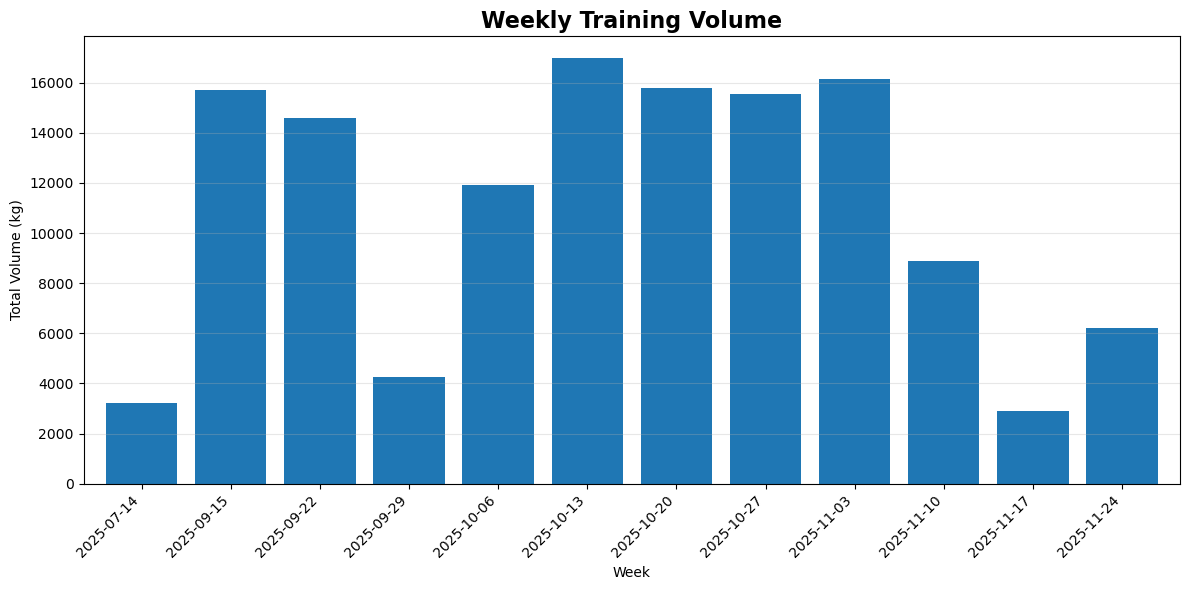

In [6]:
# df = pd.read_csv(DATA_PATH / "data_processed" / "workouts_daily_exercise.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['week'] = df['date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly = df.groupby('week')["total_volume"].sum()
weekly.index = weekly.index.astype(str)

plt.figure(figsize=(12,6))
weekly.plot(kind="bar", color='#1f77b4', width=0.8)
plt.title("Weekly Training Volume", fontsize=16, fontweight='bold')
plt.ylabel('Total Volume (kg)')
plt.xlabel('Week')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', alpha=0.3)
plt.savefig(DATA_PATH/"visualizations"/"weekly_volume.png", dpi=300)
plt.show()

# 03. Exercise Frequency Heatmap

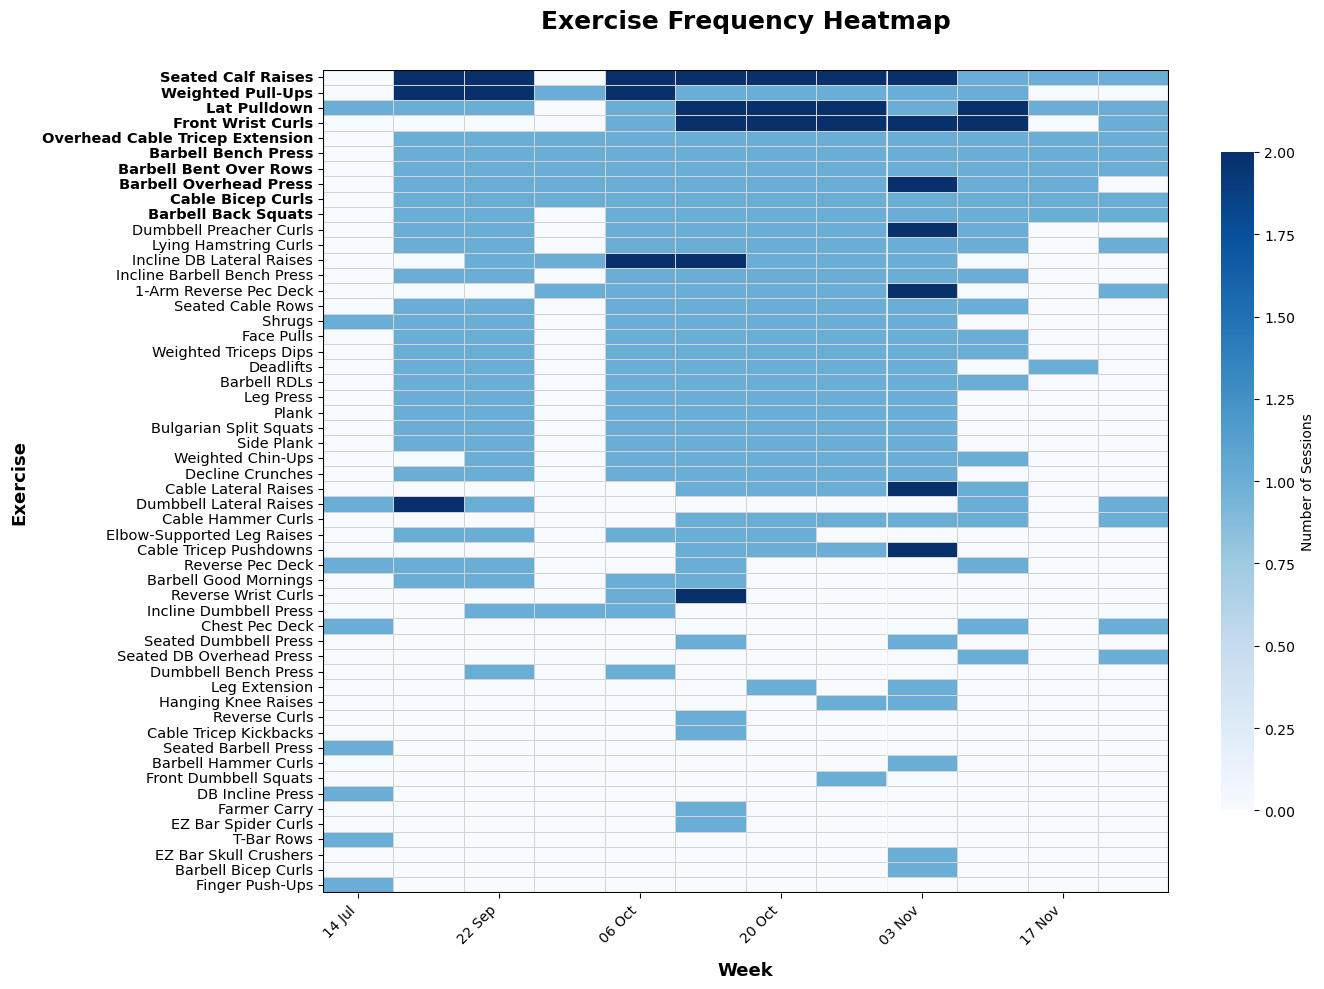

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Nice clean style
plt.style.use('default')
sns.set_palette("deep")

# Create frequency table
freq = df.groupby(['exercise', 'week']).size().unstack(fill_value=0)

# Combine same exercise with diff name variations into one
def merge_exercises(freq, variants_list, new_name):
    existing = [ex for ex in variants_list if ex in freq.index]
    if len(existing) > 1:
        freq.loc[new_name] = freq.loc[existing].sum()
        freq = freq.drop([ex for ex in existing if ex != new_name], errors='ignore')
    return freq

freq = merge_exercises(freq, ['Pull-ups', 'Weighted Pull-ups', 'Pullups'], 'Pull-ups')

# Sort exercises by total sessions (most frequent on top)
freq = freq.loc[freq.sum(axis=1).sort_values(ascending=False).index]


# Plot
plt.figure(figsize=(14, 10))

ax = sns.heatmap(freq,
                 cmap="Blues",
                 linewidths=0.5,
                 linecolor='lightgray',
                 cbar_kws={'label': 'Number of Sessions', 'shrink': 0.8},
                 annot=False,          # change to True if you want numbers inside cells
                 fmt='d')

# Make the most-trained exercises stand out more
ax.collections[0].set_clim(0, 2)  # caps the color scale at 2 → anything 2+ becomes deepest blue

# most-trained exercises name bold 
for label in ax.get_yticklabels()[:10]:
    label.set_fontweight('bold')
    label.set_fontsize(11)

# Clean & short x-axis labels 
weeks = pd.to_datetime(freq.columns)
ax.set_xticks(ax.get_xticks()[::2])  # every 3rd week
ax.set_xticklabels([w.strftime('%d %b') for w in weeks[::2]],
                   rotation=45, ha='right', fontsize=10)

# Add a faint vertical line to separate months (very classy touch)
month_starts = [i for i, w in enumerate(weeks) if w.day <= 7]  # rough month starts
for pos in month_starts[1:]:  # skip the very first
    ax.axvline(x=pos, color='white', linewidth=1.2, alpha=0.7)

# Bold border around the heatmap
plt.axhline(y=0, color='k', linewidth=1.5)
plt.axhline(y=freq.shape[0], color='k', linewidth=1.5)
plt.axvline(x=0, color='k', linewidth=1.5)
plt.axvline(x=freq.shape[1], color='k', linewidth=1.5)



# Titles and labels
plt.title("Exercise Frequency Heatmap", fontsize=18, fontweight='bold', pad=30)
plt.xlabel("Week", fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel("Exercise", fontsize=13, fontweight='bold', labelpad=10)

# Y-tick font size
plt.yticks(fontsize=10.5)


# Final touches
plt.tight_layout()
plt.savefig(DATA_PATH/"visualizations"/"exercise_freq_heatmap", dpi=300, bbox_inches='tight')
plt.show()